In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from digital_processing import plot_signal
import scipy.io as sio

In [5]:
# 14 channels, 24399 entries (the index starts at 0 though, so depending on purpose it could be 24398)
mult_df = pd.read_excel('../Data/multichannel_emg_signals.xlsx') 
mult_df.head(10)



,CH1,CH2,CH3,CH4,CH5
0,-0.000264,-0.000264,-0.000264,-0.000264,-0.000264
1,-0.000256,-0.000256,-0.000256,-0.000256,-0.000256
2,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254
3,-0.000264,-0.000264,-0.000264,-0.000264,-0.000264
4,-0.000247,-0.000247,-0.000247,-0.000247,-0.000247
5,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254
6,-0.000261,-0.000261,-0.000261,-0.000261,-0.000261
7,-0.000264,-0.000264,-0.000264,-0.000264,-0.000264
8,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259
9,-0.000252,-0.000252,-0.000252,-0.000252,-0.000252


In [ ]:
x = np.arange(24399)
emg1 = mult_df.CH1.values
emg2 = mult_df.CH2.values
emg3 = mult_df.CH3.values
emg4 = mult_df.CH4.values
emg5 = mult_df.CH5.values
emg6 = mult_df.CH6.values
emg7 = mult_df.CH7.values
emg8 = mult_df.CH8.values
emg9 = mult_df.CH9.values
emg10 = mult_df.CH10.values
emg11 = mult_df.CH11.values
emg12 = mult_df.CH12.values
emg13 = mult_df.CH13.values
emg14 = mult_df.CH14.values






AttributeError: 'DataFrame' object has no attribute 'CH6'

In [15]:
fs = 2000; #Samples per second
stim_freq = 2; #Hz
t_int = 2; #Seconds between ramp-up
stim_pulses = 5; #5 pulses during 1 ramp-up int
stim_inc = 0.5; #0.5 V ramp 

stim_max = 10; #Max ramp-up voltage
stim_min = 1;  #Pre-activation Value Volts

stim_int = np.arange(stim_min, stim_max, stim_inc).tolist()
print(stim_int)

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]


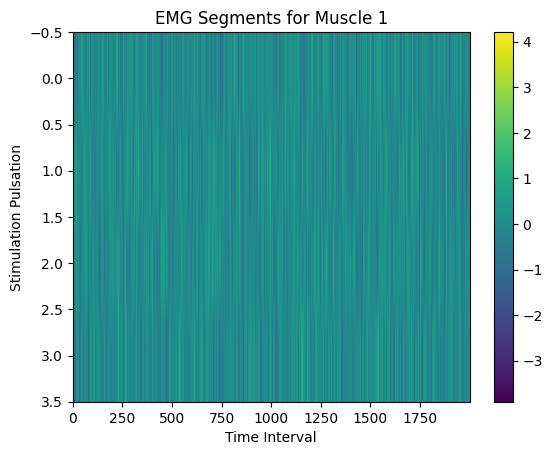

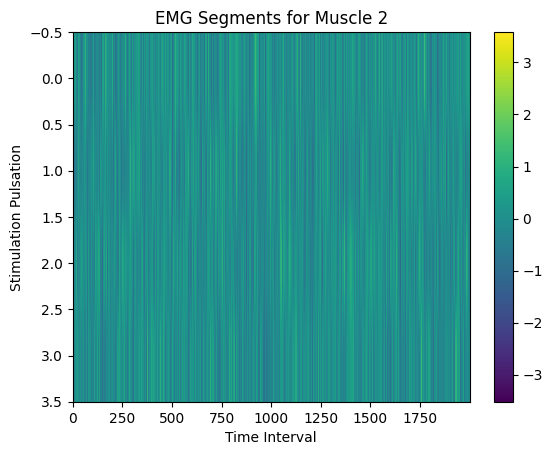

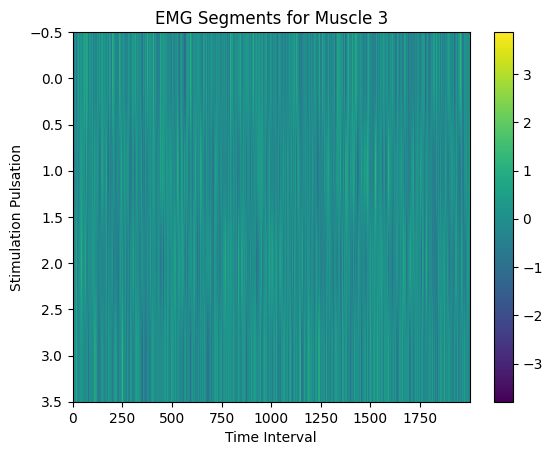

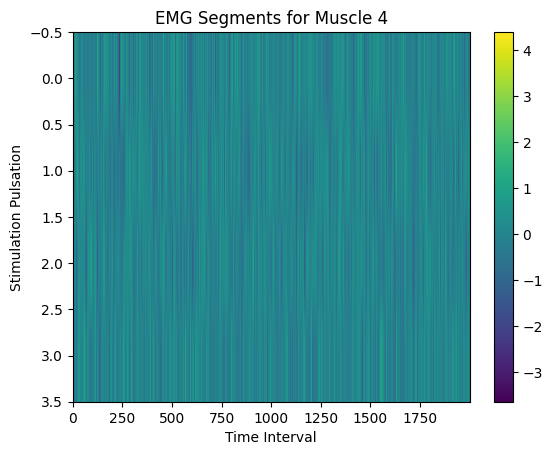

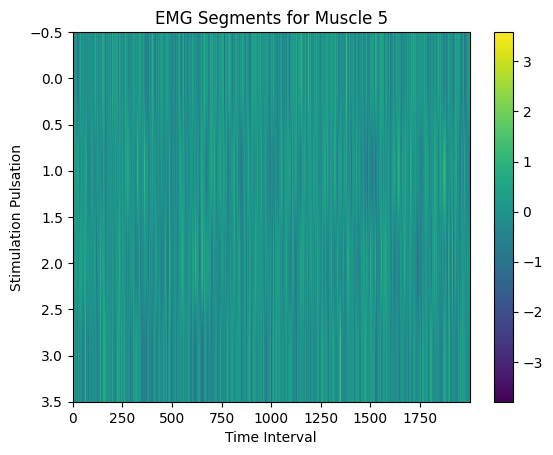

In [ ]:
def stim_timings(emg_data,fs):
    timing_data = emg_data[0]
    # timings = Stim_Pulse_data
    
    # Find the indices of the peaks
    peak_indices, _ = find_peaks(timing_data)

    # Print the peak values and their corresponding indices
    peak_times = peak_indices
    peak_values = timing_data[peak_indices]

    # Convert peak_times to milliseconds
    peak_times = peak_times/fs*1000



    return peak_times



def segment_emg_signals(emg_data, onset_timings, num_muscles):
    """
    Segment EMG signals based on the onset timings of stimulation.
    
    Parameters:
        emg_data (list of np.array): A list where each entry is an array of EMG data for a muscle.
        onset_timings (list): List of onset timings for each stimulation.
        num_muscles (int): Number of muscles.
    
    Returns:
        segmented_data (np.array): 3D array (m x n x l) where:
            - m is the number of stimulations,
            - n is the maximum time interval between consecutive stimulations,
            - l is the number of muscles.
    """
        # Calculate time intervals between consecutive stimulations
    time_intervals = np.diff(onset_timings)
    max_interval = int(np.max(time_intervals))  # Maximum interval as integer for matrix dimensions
    
    # Initialize segmented data matrix with shape (m, n, l)
    num_stimulations = len(onset_timings) - 1  # Number of segments based on stimulation
    segmented_data = np.zeros((num_stimulations, max_interval, num_muscles))
    
    # Segment the EMG data for each muscle
    for muscle_idx in range(num_muscles):
        muscle_data = emg_data[muscle_idx]
        for stim_idx in range(num_stimulations):
            start_time = onset_timings[stim_idx]
            end_time = start_time + max_interval
            
            # Segment the EMG data for the current interval
            segment = muscle_data[start_time:end_time]
            # If segment is shorter than max_interval, pad with zeros
            if len(segment) < max_interval:
                segment = np.pad(segment, (0, max_interval - len(segment)), 'constant')
            segmented_data[stim_idx, :, muscle_idx] = segment
            
    return segmented_data

def visualize_emg_segments(segmented_data):
    """
    Visualize EMG segments as colormap images for each muscle.
    
    Parameters:
        segmented_data (np.array): 3D array of segmented EMG data (m x n x l).
    """
    num_muscles = segmented_data.shape[2]
    
    for muscle_idx in range(num_muscles):
        plt.figure()
        plt.imshow(segmented_data[:, :, muscle_idx], aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'EMG Segments for Muscle {muscle_idx + 1}')
        plt.xlabel('Time (ms)')
        plt.ylabel('Stimulation Pulsation')
        plt.show()

# Example usage
# emg_data is a list where each element is a 1D numpy array of EMG data for each muscle
# onset_timings is a list of stimulation onset times (in sample points or time indices)
# num_muscles is the number of muscles recorded
emg_data = [np.random.randn(10000) for _ in range(5)]  # Example EMG data for 5 muscles
onset_timings = [0, 2000, 4000, 6000, 8000]  # Example onset timings

# onset_timings = stim_timings(emg_data, fs) 

num_muscles = len(emg_data)

# Segment the EMG data
segmented_data = segment_emg_signals(emg_data, onset_timings, num_muscles)

# Visualize the segmented EMG data
visualize_emg_segments(segmented_data) 